In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [124]:
print(Measurement)

<class 'sqlalchemy.ext.automap.measurement'>


## D1: Determine the Summary Statistics for June

In [135]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# Assign variables to the first and last dates in June
first_date = dt.date(2017, 6, 1) 
last_date = dt.date(2017, 6, 30)
print(first_date)


2017-06-01


In [125]:
#  3. Convert the June temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= first_date,
                                                            Measurement.date <= last_date).all()   
print(results)
                                                        

[('2017-06-01', 79.0), ('2017-06-02', 79.0), ('2017-06-03', 79.0), ('2017-06-04', 79.0), ('2017-06-05', 80.0), ('2017-06-06', 79.0), ('2017-06-07', 79.0), ('2017-06-08', 80.0), ('2017-06-09', 80.0), ('2017-06-10', 77.0), ('2017-06-11', 79.0), ('2017-06-12', 83.0), ('2017-06-13', 80.0), ('2017-06-14', 80.0), ('2017-06-15', 78.0), ('2017-06-16', 79.0), ('2017-06-17', 80.0), ('2017-06-18', 77.0), ('2017-06-19', 80.0), ('2017-06-20', 78.0), ('2017-06-21', 79.0), ('2017-06-22', 80.0), ('2017-06-23', 78.0), ('2017-06-24', 80.0), ('2017-06-25', 80.0), ('2017-06-26', 81.0), ('2017-06-27', 80.0), ('2017-06-28', 79.0), ('2017-06-29', 79.0), ('2017-06-30', 75.0), ('2017-06-01', 76.0), ('2017-06-02', 76.0), ('2017-06-03', 76.0), ('2017-06-04', 78.0), ('2017-06-05', 76.0), ('2017-06-06', 75.0), ('2017-06-07', 75.0), ('2017-06-08', 76.0), ('2017-06-09', 78.0), ('2017-06-10', 75.0), ('2017-06-11', 73.0), ('2017-06-12', 76.0), ('2017-06-13', 76.0), ('2017-06-14', 76.0), ('2017-06-15', 77.0), ('2017-06

<AxesSubplot:xlabel='date'>

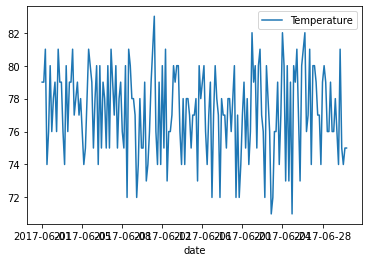

In [127]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','Temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [129]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,Temperature
count,191.000000
mean,77.219895
std,2.622538
min,71.000000
25%,75.000000
50%,77.000000
75%,79.000000
max,83.000000


## D2: Determine the Summary Statistics for December

In [117]:
from sqlalchemy import extract
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# Assign variables to the first and last dates in December
dec_first = dt.date(2016, 12, 1) 
dec_last = dt.date(2016, 12, 31)

In [130]:
# 7. Convert the December temperatures to a list.
dec_results = []
dec_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= dec_first,
                                                            Measurement.date <= dec_last).all()
                                                               
print(dec_results)


[('2016-12-01', 75.0), ('2016-12-02', 72.0), ('2016-12-03', 69.0), ('2016-12-04', 71.0), ('2016-12-05', 68.0), ('2016-12-06', 67.0), ('2016-12-07', 69.0), ('2016-12-08', 73.0), ('2016-12-09', 70.0), ('2016-12-10', 70.0), ('2016-12-11', 70.0), ('2016-12-12', 66.0), ('2016-12-13', 67.0), ('2016-12-14', 70.0), ('2016-12-15', 66.0), ('2016-12-16', 62.0), ('2016-12-17', 71.0), ('2016-12-18', 73.0), ('2016-12-19', 69.0), ('2016-12-20', 77.0), ('2016-12-21', 74.0), ('2016-12-22', 71.0), ('2016-12-23', 72.0), ('2016-12-24', 74.0), ('2016-12-25', 74.0), ('2016-12-26', 74.0), ('2016-12-27', 74.0), ('2016-12-28', 71.0), ('2016-12-29', 73.0), ('2016-12-30', 69.0), ('2016-12-31', 66.0), ('2016-12-01', 73.0), ('2016-12-02', 71.0), ('2016-12-03', 71.0), ('2016-12-04', 69.0), ('2016-12-05', 68.0), ('2016-12-06', 70.0), ('2016-12-07', 71.0), ('2016-12-08', 72.0), ('2016-12-09', 70.0), ('2016-12-10', 71.0), ('2016-12-11', 72.0), ('2016-12-12', 68.0), ('2016-12-13', 68.0), ('2016-12-14', 70.0), ('2016-12

<AxesSubplot:xlabel='date'>

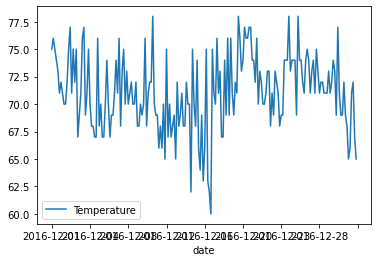

In [131]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date','Temperature'])

# Sort the dataframe by date
dec_df.set_index(dec_df['date'], inplace=True)
dec_df = dec_df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
dec_df.plot()

In [132]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Temperature
count,200.000000
mean,71.130000
std,3.419292
min,60.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,78.000000
